# **Project 2: SEC Corporate Filings Insights**


In this project, we have analyzed the Financial Statement Data Set created by the U.S. Securities and Exchange Commission (SEC). Our focus is on understanding corporate relationships and financial health using advanced data analysis tools. We have used Neo4j for graph-based data representation, enabling us to uncover complex relationships among companies and executives. Additionally, we have utilized Python libraries such as matplotlib and yfiles_jupyter_graphs_for_neo4j to visualize key financial metrics and extract meaningful insights. This has helped us better understand the intricate financial networks that exist between companies.

**Setting up the Environment, before running the code:**

Setting up the following Colab secrets will help you smoothly navigate through the code and execute it seamlessly.

**PROJECT2_CONCAT** - Have used to store path of the files which were generated in this project. Common path to save combined files and other files which are created further into questions

**PROJECT2_PWD** - Neo4j password

**PROJECT2_URI** - Neo4j URI

**PROJECT2_USER** - Neo4j User

**PROJECT2_ZIPPED** - Path of the dataset

**PROJECT2_UNZIPPED** - Path where the dataset was extracted

**PROJECT2_SEC_API** - SEC API TOKEN

In [ ]:
from typing_extensions import Concatenate
from google.colab import drive, userdata
import zipfile
import os
import pandas as pd

drive.mount('/content/drive')

zips_folder = userdata.get('PROJECT2_ZIPPED')  # Folder containing zipped files
extract_base_path = userdata.get('PROJECT2_UNZIPPED')  # Base path to extract the files

sub_dfs = []
tag_dfs = []
num_dfs = []
pre_dfs = []

for zip_file in os.listdir(zips_folder):
    if zip_file.endswith('.zip'):
        quarter_name = zip_file.split('.')[0]
        extract_path = os.path.join(extract_base_path, quarter_name)

        if not os.path.exists(extract_path):
            os.makedirs(extract_path)

        zip_file_path = os.path.join(zips_folder, zip_file)
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)

        for file_name in os.listdir(extract_path):
            file_path = os.path.join(extract_path, file_name)
            if file_name == 'sub.txt':
                df = pd.read_csv(file_path, delimiter='\t')
                sub_dfs.append(df)
            elif file_name == 'tag.txt':
                df = pd.read_csv(file_path, delimiter='\t')
                tag_dfs.append(df)
            elif file_name == 'num.txt':
                df = pd.read_csv(file_path, delimiter='\t')
                num_dfs.append(df)
            elif file_name == 'pre.txt':
                df = pd.read_csv(file_path, delimiter='\t')
                pre_dfs.append(df)
            # Skip the readme file
            elif file_name == 'readme.htm':
                continue

print("Files have been extracted.")

concat_sub = pd.concat(sub_dfs, ignore_index=True)
concat_tag = pd.concat(tag_dfs, ignore_index=True)
concat_num = pd.concat(num_dfs, ignore_index=True)
concat_pre = pd.concat(pre_dfs, ignore_index=True)

print("Files are getting merged....")

# Retrieving the path stored in the secret key
concatenated_path = userdata.get('PROJECT2_CONCAT') #Common path to save combined files and other files which are created further into questions

concat_sub.to_csv(os.path.join(concatenated_path, 'combined_sub.csv'), index=False)
concat_tag.to_csv(os.path.join(concatenated_path, 'combined_tag.csv'), index=False)
concat_num.to_csv(os.path.join(concatenated_path, 'combined_num.csv'), index=False)
concat_pre.to_csv(os.path.join(concatenated_path, 'combined_pre.csv'), index=False)

print("Files have been merged and saved to the concatenated directory.")
print("Files have been merged and saved as CSVs.")


Mounted at /content/drive
Files have been extracted.
Files are getting merged....
Files have been merged and saved to the concatenated directory.
Files have been merged and saved as CSVs.


## **1. Analyze financial statements for companies. Financial Statement Comparison allows analysts and investors to compare financial statements of different companies, aiding in benchmarking and performance evaluation.**

In [ ]:
!pip install pyspark
!pip install neo4j
!pip install neo4j yfiles_jupyter_graphs_for_neo4j
!pip install neo4j
!pip install py2neo
!pip install networkx
!pip install matplotlib
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=415342cf0a4a35e9221084fc459e31b7289979179a7cae1494ad92740065f578
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.6/296.6 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.1 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.9
    Uninstalling widgetsnbextension-3.6.9:
      Successfully uninstalled widgetsnbexte

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from py2neo import Graph
from neo4j import GraphDatabase
import plotly.express as px

In [ ]:
uri = userdata.get('PROJECT2_URI')
username = userdata.get('PROJECT2_USER')
password = userdata.get('PROJECT2_PWD')

# Neo4j connection
uri = uri
username = username
password = password


driver = GraphDatabase.driver(uri, auth=(username, password))
graph = Graph(uri, auth=(username, password))

In [ ]:
def run_query(query):
    with driver.session() as session:
        result = session.run(query)
        return list(result)

query = "RETURN 'Connected to Neo4j' as message"
result = run_query(query)

for record in result:
    print(record['message'])


Connected to Neo4j


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as _sum

spark = SparkSession.builder.appName("Financial Analysis").getOrCreate()

combined_num_df = spark.read.csv(concatenated_path+'/combined_num.csv', header=True, inferSchema=True)
combined_sub_df = spark.read.csv(concatenated_path+'/combined_sub.csv', header=True, inferSchema=True)

merged_df = combined_num_df.join(combined_sub_df, "adsh")

revenue_data = merged_df.filter(col('tag') == 'Revenue')

top_companies_df = revenue_data.groupBy('name').agg(_sum('value').alias('total_revenue'))

top_5_companies_df = top_companies_df.orderBy(col('total_revenue').desc()).limit(5)

top_5_companies = top_5_companies_df.collect()

print(top_5_companies)


[Row(name='ELBIT SYSTEMS LTD', total_revenue=8990980000.0), Row(name='ENVIROMART COMPANIES, INC.', total_revenue=3141293.0), Row(name='M2 NGAGE GROUP, INC.', total_revenue=53991.0), Row(name='VERITEC INC', total_revenue=0.78)]


In [ ]:
def run_query(query, parameters=None):
    with driver.session() as session:
        if parameters:
            result = session.run(query, parameters)
        else:
            result = session.run(query)
        # Materialize the result into a list immediately
        return list(result) # This change ensures the result is fully fetched

# Function to add companies to Neo4j
def add_company_and_revenue_to_neo4j(company_name, revenue_value):
    query = """
    MERGE (c:Company {name: $company_name})
    MERGE (m:Metric {tag: 'Revenue', value: $revenue_value})
    MERGE (c)-[:HAS_METRIC]->(m)
    """
    run_query(query, {"company_name": company_name, "revenue_value": revenue_value})

# Function to retrieve company metrics from Neo4j
def get_company_metrics_from_neo4j(company_name):
    query = """
    MATCH (c:Company {name: $company_name})-[:HAS_METRIC]->(m:Metric)
    RETURN m.tag as tag, m.value as value
    """
    results = run_query(query, {"company_name": company_name})
    return [(record["tag"], record["value"]) for record in results]

for row in top_5_companies:
    company_name = row['name']
    revenue_value = row['total_revenue']
    add_company_and_revenue_to_neo4j(company_name, revenue_value)

# Retrieving metrics for each top company
for row in top_5_companies:
    company_name = row['name']
    metrics = get_company_metrics_from_neo4j(company_name)
    print(f"Metrics for {company_name}: {metrics}")

Metrics for ELBIT SYSTEMS LTD: [('Assets', 265917.0), ('Revenues', 114169.0), ('GrossProfit', -141366.0), ('Revenue', 8990980000.0)]
Metrics for ENVIROMART COMPANIES, INC.: [('Assets', 265917.0), ('Assets', 2428019.0), ('Revenues', 703109.0), ('GrossProfit', -141366.0), ('GrossProfit', 264837.0), ('Revenue', 3141293.0)]
Metrics for M2 NGAGE GROUP, INC.: [('Assets', 265917.0), ('Liabilities', 7334220.0), ('Revenues', 114169.0), ('GrossProfit', -141366.0), ('Revenue', 53991.0)]
Metrics for VERITEC INC: [('Assets', 265917.0), ('Liabilities', 7334220.0), ('Revenues', 114169.0), ('Assets', 2428019.0), ('Liabilities', 3831642.0), ('Revenues', 703109.0), ('GrossProfit', -141366.0), ('GrossProfit', 264837.0), ('Assets', 125601.0), ('Liabilities', 27694349.0), ('Revenues', 0.0), ('GrossProfit', 0.0), ('Revenue', 0.78)]


## **2. Cluster companies based on financial health. Financial health is a function of revenue and debt, i.e. a health company will have high revenue and low debt.**

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Financial Health Analysis").getOrCreate()

sub_df = spark.read.csv(concatenated_path+'/combined_sub.csv', header=True, inferSchema=True)
num_df = spark.read.csv(concatenated_path+'/combined_num.csv', header=True, inferSchema=True)
tag_df = spark.read.csv(concatenated_path+'/combined_tag.csv', header=True, inferSchema=True)

sub_df.show(5)
num_df.show(5)
tag_df.show(5)


+--------------------+-------+--------------------+------+---------+------+----------+----------+--------------------+------------+------------+---------+------+----------+----------+--------------------+-----------+----------+-------+------------+--------------------+-----------+-----+----+------+------+--------+------+----+--------+-------------------+-------+------+-----------------+-----+-----+
|                adsh|    cik|                name|   sic|countryba|stprba|    cityba|     zipba|                bas1|        bas2|        baph|countryma|stprma|    cityma|     zipma|                mas1|       mas2|countryinc|stprinc|         ein|              former|    changed|  afs|wksi|   fye|  form|  period|    fy|  fp|   filed|           accepted|prevrpt|detail|         instance|nciks|aciks|
+--------------------+-------+--------------------+------+---------+------+----------+----------+--------------------+------------+------------+---------+------+----------+----------+-------------

In [ ]:
# Merging NUM with TAG on the 'tag' column
merged_num_tag_df = num_df.join(tag_df, on='tag', how='inner')

merged_num_tag_df.show(5)


+--------------+--------------------+--------------------+-----+--------+----+---+-----------+--------+--------------------+------+--------+--------+----+----+----------------+--------------------+
|           tag|                adsh|             version|coreg|   ddate|qtrs|uom|      value|footnote|             version|custom|abstract|datatype|iord|crdr|          tlabel|                 doc|
+--------------+--------------------+--------------------+-----+--------+----+---+-----------+--------+--------------------+------+--------+--------+----+----+----------------+--------------------+
|ACAIndustryFee|0001279363-16-000095|0001279363-16-000095| NULL|20151231|   0|USD|        0.0|    NULL|0001279363-16-000095|     1|       0|monetary|   I|   C|ACA Industry Fee|ACA Industry Fee ...|
|ACAIndustryFee|0001279363-16-000095|0001279363-16-000095| NULL|20151231|   0|USD|        0.0|    NULL|0001279363-16-000111|     1|       0|monetary|   I|   C|ACA Industry Fee|ACA Industry Fee ...|
|ACAIndust

In [ ]:
# Merging the merged NUM+TAG data with SUB on 'adsh'
merged_sub_num_tag_df = sub_df.join(merged_num_tag_df, on='adsh', how='inner')

merged_sub_num_tag_df.show(5)


+--------------------+-------+--------------------+------+---------+------+------+-----+-------------------+---------------+----------+---------+------+------+-----+-------------------+---------------+----------+-------+-----------+------------------+----------+-----+----+------+----+--------+------+---+--------+-------------------+-------+------+----------------+-----+-----+--------------+--------------------+-----+--------+----+---+-----------+--------+--------------------+------+--------+--------+----+----+----------------+--------------------+
|                adsh|    cik|                name|   sic|countryba|stprba|cityba|zipba|               bas1|           bas2|      baph|countryma|stprma|cityma|zipma|               mas1|           mas2|countryinc|stprinc|        ein|            former|   changed|  afs|wksi|   fye|form|  period|    fy| fp|   filed|           accepted|prevrpt|detail|        instance|nciks|aciks|           tag|             version|coreg|   ddate|qtrs|uom|      va

In [ ]:
# Defining the relevant tags for Debt and Revenue
debt_tags = ['LongTermDebt','ShortTermBorrowings','LongTermDebtCurrent','ConvertibleDebtNoncurrent', 'ConvertibleDebtCurrent']

revenue_tags = ['Revenue', 'SalesRevenue','OperatingRevenue']

filtered_df = merged_sub_num_tag_df.filter(merged_sub_num_tag_df['tag'].isin(debt_tags + revenue_tags))

filtered_df.show(5)


+--------------------+-------+---------------+------+---------+------+------+-----+------------------+--------------------+----------+---------+------+------+-----+------------------+--------------------+----------+-------+------------+------+-------+-----+----+------+----+--------+------+---+--------+-------------------+-------+------+-----------------+-----+-----+--------------------+------------+-----+--------+----+---+-----------+--------+------------+------+--------+--------+----+----+--------------------+--------------------+
|                adsh|    cik|           name|   sic|countryba|stprba|cityba|zipba|              bas1|                bas2|      baph|countryma|stprma|cityma|zipma|              mas1|                mas2|countryinc|stprinc|         ein|former|changed|  afs|wksi|   fye|form|  period|    fy| fp|   filed|           accepted|prevrpt|detail|         instance|nciks|aciks|                 tag|     version|coreg|   ddate|qtrs|uom|      value|footnote|     version|cu

In [ ]:
from pyspark.sql.functions import col, sum as _sum, coalesce, lit

# Pivoting the data to aggregate by company name
pivot_df = filtered_df.groupBy('name').agg(
    _sum(coalesce(col('value'), lit(0))).alias('TotalRevenue'),
    _sum(coalesce(col('value'), lit(0))).alias('TotalDebt')
)

pivot_df.show()

+--------------------+------------+------------+
|                name|TotalRevenue|   TotalDebt|
+--------------------+------------+------------+
|GRAPHIC PACKAGING...| 1.632236E11| 1.632236E11|
|     XCEL ENERGY INC|1.9554291E11|1.9554291E11|
|           COACH INC|   6.7855E10|   6.7855E10|
|GOOD TIMES RESTAU...|    1.3302E8|    1.3302E8|
|CENTRAL PACIFIC F...|1.4658935E10|1.4658935E10|
|     1ST SOURCE CORP|1.6043715E10|1.6043715E10|
|CIM COMMERCIAL TR...| 3.247244E10| 3.247244E10|
|INFINITY PROPERTY...| 2.190607E10| 2.190607E10|
|COMMUNITY CHOICE ...|   4.27167E9|   4.27167E9|
|         TRIMAS CORP|    4.2568E9|    4.2568E9|
|        HOMEFED CORP|   8.10197E9|   8.10197E9|
|CINCINNATI FINANC...|     7.86E10|     7.86E10|
|NCI BUILDING SYST...|         0.0|         0.0|
|TEXAS INSTRUMENTS...|   3.9973E11|   3.9973E11|
|CATERPILLAR FINAN...| 1.400183E12| 1.400183E12|
|         MARCUS CORP|   9.64882E9|   9.64882E9|
|AMERICAN TOWER CO...|1.5544677E12|1.5544677E12|
|      LHC GROUP, IN

In [ ]:
from pyspark.ml.feature import VectorAssembler

# Creating a VectorAssembler
assembler = VectorAssembler(inputCols=['TotalDebt', 'TotalRevenue'], outputCol='features')

features_df = assembler.transform(pivot_df)

features_df.select('name', 'TotalDebt', 'TotalRevenue', 'features').show(5)


+--------------------+------------+------------+--------------------+
|                name|   TotalDebt|TotalRevenue|            features|
+--------------------+------------+------------+--------------------+
|GRAPHIC PACKAGING...| 1.632236E11| 1.632236E11|[1.632236E11,1.63...|
|     XCEL ENERGY INC|1.9554291E11|1.9554291E11|[1.9554291E11,1.9...|
|           COACH INC|   6.7855E10|   6.7855E10|[6.7855E10,6.7855...|
|GOOD TIMES RESTAU...|    1.3302E8|    1.3302E8| [1.3302E8,1.3302E8]|
|CENTRAL PACIFIC F...|1.4658935E10|1.4658935E10|[1.4658935E10,1.4...|
+--------------------+------------+------------+--------------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.clustering import KMeans

# Creating a KMeans object with the desired number of clusters
kmeans = KMeans(k=3, seed=1)  # You can adjust the number of clusters as needed

model = kmeans.fit(features_df)

predictions = model.transform(features_df)

predictions.select('name', 'TotalDebt', 'TotalRevenue', 'prediction').show(5)


+--------------------+------------+------------+----------+
|                name|   TotalDebt|TotalRevenue|prediction|
+--------------------+------------+------------+----------+
|GRAPHIC PACKAGING...| 1.632236E11| 1.632236E11|         0|
|     XCEL ENERGY INC|1.9554291E11|1.9554291E11|         0|
|           COACH INC|   6.7855E10|   6.7855E10|         0|
|GOOD TIMES RESTAU...|    1.3302E8|    1.3302E8|         0|
|CENTRAL PACIFIC F...|1.4658935E10|1.4658935E10|         0|
+--------------------+------------+------------+----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import ClusteringEvaluator

# Evaluating clustering by computing the Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print(f'Silhouette score: {silhouette}')


Silhouette score: 0.9990844353105593


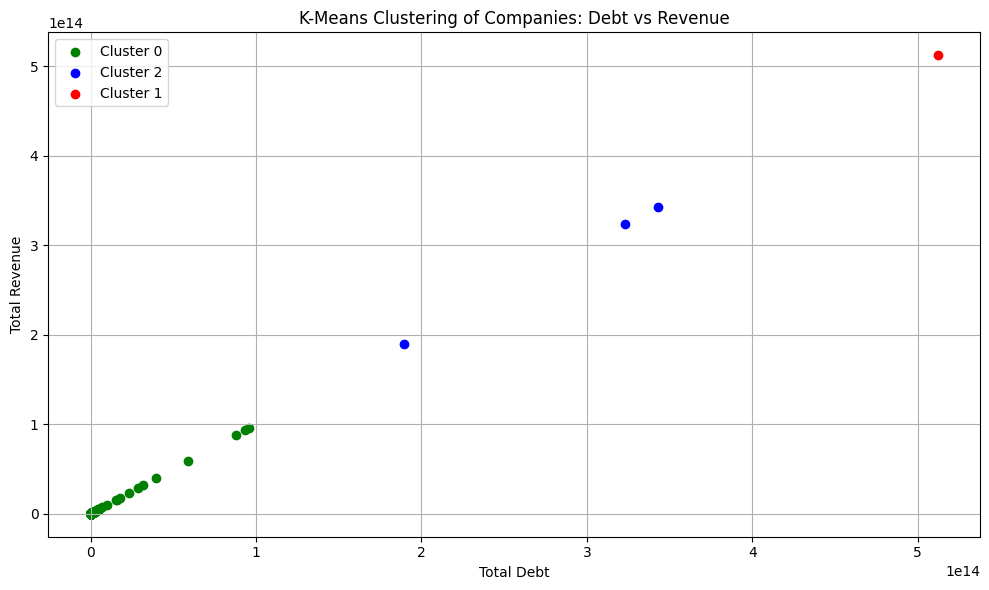

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

predictions_pd = predictions.select('name', 'TotalDebt', 'TotalRevenue', 'prediction').toPandas()

plt.figure(figsize=(10, 6))
colors = {0: 'green', 1: 'red', 2: 'blue'}

for cluster in predictions_pd['prediction'].unique():
    cluster_data = predictions_pd[predictions_pd['prediction'] == cluster]
    plt.scatter(cluster_data['TotalDebt'], cluster_data['TotalRevenue'],
                label=f'Cluster {cluster}', color=colors[cluster])

plt.xlabel('Total Debt')
plt.ylabel('Total Revenue')
plt.title('K-Means Clustering of Companies: Debt vs Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## **3. Identify unusual reporting patterns or significant deviations from historical data, which may indicate potential fraud or misrepresentation.**


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as _sum

spark = SparkSession.builder.appName("Financial Analysis").getOrCreate()

combined_num_df = spark.read.csv(concatenated_path+'/combined_num.csv', header=True, inferSchema=True)
combined_sub_df = spark.read.csv(concatenated_path+'/combined_sub.csv', header=True, inferSchema=True)

merged_df = combined_num_df.join(combined_sub_df, "adsh")


In [ ]:
# Filtering necessary columns (adjust based on your analysis)
merged_df = merged_df.select('adsh', 'cik', 'ddate', 'tag', 'value', 'name', 'form', 'period')

merged_df.show(5)


+--------------------+----+--------+--------------------+-----------+--------------------+----+--------+
|                adsh| cik|   ddate|                 tag|      value|                name|form|  period|
+--------------------+----+--------+--------------------+-----------+--------------------+----+--------+
|0000003545-16-000130|3545|20150930|AccountsPayableCu...|  4407000.0|           ALICO INC|10-Q|20151231|
|0000003545-16-000130|3545|20151231|AccountsPayableCu...|  3520000.0|           ALICO INC|10-Q|20151231|
|0000004127-16-000044|4127|20150930|AccountsPayableCu...|291100000.0|SKYWORKS SOLUTION...|10-Q|20151231|
|0000004127-16-000044|4127|20151231|AccountsPayableCu...|191800000.0|SKYWORKS SOLUTION...|10-Q|20151231|
|0000004187-16-000034|4187|20141231|AccountsPayableCu...|  2622000.0|INDUSTRIAL SERVIC...|10-K|20151231|
+--------------------+----+--------+--------------------+-----------+--------------------+----+--------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import to_date

merged_df = merged_df.withColumn('period', to_date(merged_df['period'].cast("string"), 'yyyyMMdd'))

In [ ]:
data_to_send = merged_df.limit(500).collect()  # Collect only the first 500 rows

def create_node(tx, adsh, cik, ddate, tag, value, name, form, period):
    tx.run("""
        CREATE (n:Record {adsh: $adsh, cik: $cik, ddate: $ddate, tag: $tag,
                          value: $value, name: $name, form: $form, period: $period})
    """, adsh=adsh, cik=cik, ddate=ddate, tag=tag, value=value, name=name, form=form, period=period)

with driver.session() as session:
    for row in data_to_send:
        session.write_transaction(create_node, row.adsh, row.cik, row.ddate,
                                   row.tag, row.value, row.name, row.form, row.period)


<ipython-input-22-66b7ceeba09a>:11: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(create_node, row.adsh, row.cik, row.ddate,


In [ ]:
with driver.session() as session:
    query = """
    MATCH (r:Record)
    RETURN COUNT(r) AS total_records
    """
    total_records = session.run(query).single()[0]
    print(f"Total records in database: {total_records}")


Total records in database: 1000


In [ ]:
def fetch_value_and_period():
    with driver.session() as session:
        query = """
        MATCH (n:Record)
        RETURN toFloat(n.value) AS value, n.period AS period, n.tag AS tag, n.cik AS cik
        LIMIT 1000
        """
        result = session.run(query)

        # Collect the results into a list of dictionaries
        data = [record.data() for record in result]

        # Convert to a pandas DataFrame for easier manipulation
        df = pd.DataFrame(data)

        return df  # Return the DataFrame

# Fetch the data
value_period_df = fetch_value_and_period()


In [ ]:
value_period_df['period'] = pd.to_datetime(value_period_df['period'], format='%Y-%m-%d')

value_period_df['value'] = pd.to_numeric(value_period_df['value'], errors='coerce')

historical_df = value_period_df.groupby(['cik', 'tag'])['value'].agg(['mean', 'std']).reset_index()
historical_df.columns = ['cik', 'tag', 'avg_value', 'stddev_value']  # Rename columns for clarity

current_vs_history_df = pd.merge(value_period_df, historical_df, on=['cik', 'tag'])

print(current_vs_history_df)


           value     period                     tag      cik    avg_value  \
0      4407000.0 2015-12-31  AccountsPayableCurrent     3545    3963500.0   
1      3520000.0 2015-12-31  AccountsPayableCurrent     3545    3963500.0   
2    291100000.0 2015-12-31  AccountsPayableCurrent     4127  241450000.0   
3    191800000.0 2015-12-31  AccountsPayableCurrent     4127  241450000.0   
4      2622000.0 2015-12-31  AccountsPayableCurrent     4187    2387000.0   
..           ...        ...                     ...      ...          ...   
995  122705000.0 2015-12-31  AccountsPayableCurrent  1130713  117746000.0   
996   61533000.0 2015-12-31  AccountsPayableCurrent  1138639   77043500.0   
997   92554000.0 2015-12-31  AccountsPayableCurrent  1138639   77043500.0   
998     455000.0 2015-12-31  AccountsPayableCurrent  1001614     303000.0   
999     151000.0 2015-12-31  AccountsPayableCurrent  1001614     303000.0   

     stddev_value  
0    5.121097e+05  
1    5.121097e+05  
2    5.733088e+

In [ ]:
deviation_threshold = 1

current_vs_history_df['deviation'] = (current_vs_history_df['value'] - current_vs_history_df['avg_value']) / current_vs_history_df['stddev_value']

# Filtering for potential fraud cases (deviation greater than threshold)
potential_fraud_df = current_vs_history_df[abs(current_vs_history_df['deviation']) > deviation_threshold]

print(potential_fraud_df[['cik', 'tag', 'value', 'avg_value', 'deviation']].head(10))

       cik                     tag         value     avg_value  deviation
6     6955  AccountsPayableCurrent  1.181150e+08  4.849960e+07   1.426764
7     6955  AccountsPayableCurrent  1.243830e+08  4.849960e+07   1.555226
68  101830  AccountsPayableCurrent  4.347000e+09  1.485000e+09   1.497743
72  101830  AccountsPayableCurrent  4.347000e+09  1.485000e+09   1.497743
78  102729  AccountsPayableCurrent  1.965650e+08  7.530960e+07   1.715611
79  102729  AccountsPayableCurrent  1.799830e+08  7.530960e+07   1.480997
86  102729  AccountsPayableCurrent  0.000000e+00  7.530960e+07  -1.065536
87  102729  AccountsPayableCurrent  0.000000e+00  7.530960e+07  -1.065536
90  102741  AccountsPayableCurrent  5.046390e+08  5.457767e+08  -1.217025
91  110471  AccountsPayableCurrent  1.494000e+08  8.727500e+07   1.090501


In [ ]:
count = potential_fraud_df.shape[0]
print(f"Number of potential fraud records: {count}")

Number of potential fraud records: 102


## **4. Analyze how corporate executives and board members are connected across different companies and perform centrality analysis. Note that this dataset directly does not contain the names of office holders for a company. This data will need to be extracted from other sources such as Form 8-K or Form 10-K, or any third party data source.**

To address the problem statement, I am utilizing the sub dataset. Specifically, I plan to use the cik and name columns to map corporate executives to their respective companies. By integrating this data with information extracted from sources like SEC EDGAR Database, YFinance API, and SEC-API, I have analyzed the connections between executives and companies and performed centrality analysis.

In [ ]:
import pandas as pd

sub_file_path = concatenated_path+'/combined_sub.csv'

df = pd.read_csv(sub_file_path)

df_selected = df[['cik', 'name']]  # Make sure only these columns are selected , 'sic'

df_selected

,cik,name
0,1267565,"COLLEGIUM PHARMACEUTICAL, INC"
1,718924,SPAN AMERICA MEDICAL SYSTEMS INC
2,1656501,"BORROWMONEY.COM, INC."
3,1487782,"REVEN HOUSING REIT, INC."
4,62234,MARCUS CORP
...,...,...
27672,1403085,"JRJR33, INC."
27673,1076682,MAJESCO ENTERTAINMENT CO
27674,827876,"CLEANSPARK, INC."
27675,1680132,GEANT CORP.


**-------------------------- Start of Fetching External Data --------------------**

I am retrieving company members' data using the **Yahoo Finance (Yfinance) API**. To do this, I need tickers as input for the Yfinance API. Therefore, I am obtaining company tickers from the SEC EDGAR website, and then mapping these tickers to the existing sub dataset.

The following step is to fetch tickers to use for API requests with the Yfinance API.

In [ ]:
import pandas as pd
import requests


# Select relevant columns only (cik, name), creating a copy to avoid chained assignment issues
df_selected_map = df[['cik', 'name']].copy()

# Load JSON from the provided SEC URL with error handling
json_url = "https://www.sec.gov/files/company_tickers.json"
headers = {
    "User-Agent": "YourName/YourCompany your_email@example.com"  # Recommended header to avoid being blocked
}

try:
    response = requests.get(json_url, headers=headers)
    response.raise_for_status()  # Raise an error if the request was not successful

    # Check the response content type to ensure it's JSON
    if 'application/json' in response.headers.get('Content-Type'):
        company_data = response.json()

        # Create a dictionary to map cik to ticker with cik as int
        cik_to_ticker = {value["cik_str"]: value["ticker"] for key, value in company_data.items()}

        # Map the ticker using the cik_to_ticker dictionary, keeping cik as an integer
        df_selected_map['ticker'] = df_selected_map['cik'].map(cik_to_ticker)

        # Fill NaN values in the ticker column with 'N/A'
        df_selected_map['ticker'] = df_selected_map['ticker'].fillna('N/A')

        # Preview the data
        print(df_selected_map.head())
    else:
        print("Unexpected Content-Type. Expected JSON.")

except requests.exceptions.RequestException as e:
    # Print the error if the request fails
    print(f"Error fetching the JSON data: {e}")


       cik                              name ticker
0  1267565     COLLEGIUM PHARMACEUTICAL, INC   COLL
1   718924  SPAN AMERICA MEDICAL SYSTEMS INC    N/A
2  1656501             BORROWMONEY.COM, INC.   BWMY
3  1487782          REVEN HOUSING REIT, INC.    N/A
4    62234                       MARCUS CORP    MCS


In [ ]:
df_selected_map

,cik,name,ticker
0,1267565,"COLLEGIUM PHARMACEUTICAL, INC",COLL
1,718924,SPAN AMERICA MEDICAL SYSTEMS INC,N/A
2,1656501,"BORROWMONEY.COM, INC.",BWMY
3,1487782,"REVEN HOUSING REIT, INC.",N/A
4,62234,MARCUS CORP,MCS
...,...,...,...
27672,1403085,"JRJR33, INC.",N/A
27673,1076682,MAJESCO ENTERTAINMENT CO,RGTPQ
27674,827876,"CLEANSPARK, INC.",CLSK
27675,1680132,GEANT CORP.,CSUI


Now I am using **Yfinance API** to get executive and board members details:

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
import os

all_executive_data = []

output_file_path = concatenated_path+'/executive_details_part1.csv'

if os.path.exists(output_file_path):
    # If the CSV file already exists, load it to create the initial data and extract processed tickers
    existing_df = pd.read_csv(output_file_path)
    processed_tickers = existing_df['ticker'].unique()

    all_executive_data.extend(existing_df.to_dict('records'))
else:
    processed_tickers = []

def fetch_executive_data(ticker):
    if ticker == 'N/A':
        return []

    stock = yf.Ticker(ticker)
    executive_data = []

    try:

        company_info = stock.info

        company_name = company_info.get("longName", "N/A")

        if "companyOfficers" in company_info:
            executives = company_info["companyOfficers"]

            for executive in executives:
                executive_data.append({
                    "ticker": ticker,
                    "company_name": company_name,
                    "executive_name": executive.get("name", "N/A"),
                    "position": executive.get("title", "N/A")
                })

        if not company_info.get("companyOfficers"):
            executive_data.append({
                "ticker": ticker,
                "company_name": company_name,
                "executive_name": "N/A",
                "position": "N/A"
            })

    except Exception as e:
        print(f"Error retrieving data for ticker {ticker}: {e}")
        executive_data.append({
            "ticker": ticker,
            "company_name": "N/A",
            "executive_name": "N/A",
            "position": "N/A"
        })

    return executive_data

unique_tickers = df_selected_map['ticker'].unique()

# Setting the number of workers to 4 (this is done for parallel performance to optimize and for faster processing of data, you can adjust this as per your choice.)
with ThreadPoolExecutor(max_workers=4) as executor:

    futures = {executor.submit(fetch_executive_data, ticker): ticker for ticker in unique_tickers if ticker not in processed_tickers}

    for future in as_completed(futures):
        result = future.result()
        all_executive_data.extend(result)

        current_executive_df = pd.DataFrame(result, columns=["ticker", "company_name", "executive_name", "position"])

        if not os.path.exists(output_file_path):
            current_executive_df.to_csv(output_file_path, mode='w', index=False, header=True)
        else:
            current_executive_df.to_csv(output_file_path, mode='a', index=False, header=False)

        # Small delay to avoid getting blocked (you can reduce or experiment with removing this)
        time.sleep(0.2)


executives_part_1 = pd.DataFrame(all_executive_data, columns=["ticker", "company_name", "executive_name", "position"])

print("Processing complete. Final executive details saved in the csv format.")
executives_part_1


Processing complete. Final executive details saved in the csv format.


,ticker,company_name,executive_name,position
0,MCS,The Marcus Corporation,Mr. Gregory S. Marcus,"President, CEO & Chairman"
1,MCS,The Marcus Corporation,Mr. Chad M. Paris,CFO & Treasurer
2,MCS,The Marcus Corporation,Mr. Thomas F. Kissinger,"Senior EVP, General Counsel, Secretary & Director"
3,MCS,The Marcus Corporation,Mr. Michael R. Evans,President of Marcus Hotels & Resorts division
4,MCS,The Marcus Corporation,Mr. Mark A. Gramz,President of Marcus Theatres Corporation
...,...,...,...,...
26401,RMSL,"REMSleep Holdings, Inc.",Mr. Thomas J. Wood,"Founder, CEO, President, Secretary & Director"
26402,RMSL,"REMSleep Holdings, Inc.",Mr. Jonathan B. Lane,VP & CTO
26403,GPOX,"GPO Plus, Inc.",Mr. Brett H. Pojunis,"Chairman, President, CEO, CFO, Secretary & Tre..."
26404,GPOX,"GPO Plus, Inc.",Nadege Bellissan,Chief Executive Officer of Nutriumph Division


In [ ]:
executives_part_1 = pd.DataFrame(all_executive_data, columns=["ticker", "company_name", "executive_name", "position"])

executives_part_1

,ticker,company_name,executive_name,position
0,MCS,The Marcus Corporation,Mr. Gregory S. Marcus,"President, CEO & Chairman"
1,MCS,The Marcus Corporation,Mr. Chad M. Paris,CFO & Treasurer
2,MCS,The Marcus Corporation,Mr. Thomas F. Kissinger,"Senior EVP, General Counsel, Secretary & Director"
3,MCS,The Marcus Corporation,Mr. Michael R. Evans,President of Marcus Hotels & Resorts division
4,MCS,The Marcus Corporation,Mr. Mark A. Gramz,President of Marcus Theatres Corporation
...,...,...,...,...
26401,RMSL,"REMSleep Holdings, Inc.",Mr. Thomas J. Wood,"Founder, CEO, President, Secretary & Director"
26402,RMSL,"REMSleep Holdings, Inc.",Mr. Jonathan B. Lane,VP & CTO
26403,GPOX,"GPO Plus, Inc.",Mr. Brett H. Pojunis,"Chairman, President, CEO, CFO, Secretary & Tre..."
26404,GPOX,"GPO Plus, Inc.",Nadege Bellissan,Chief Executive Officer of Nutriumph Division


In [ ]:
executives_part_1_mapped = pd.merge(
    executives_part_1,
    df_selected_map[['cik', 'ticker']],  # Selected only relevant columns from df_selected_map
    on='ticker',
    how='inner'
)

executives_part_1_mapped = executives_part_1_mapped[['cik','company_name', 'ticker', 'executive_name', 'position']]

# Droping duplicates based on all columns to keep only unique rows
executives_part_1_mapped = executives_part_1_mapped.drop_duplicates()

executives_part_1_mapped


,cik,company_name,ticker,executive_name,position
0,62234,The Marcus Corporation,MCS,Mr. Gregory S. Marcus,"President, CEO & Chairman"
5,62234,The Marcus Corporation,MCS,Mr. Chad M. Paris,CFO & Treasurer
10,62234,The Marcus Corporation,MCS,Mr. Thomas F. Kissinger,"Senior EVP, General Counsel, Secretary & Director"
15,62234,The Marcus Corporation,MCS,Mr. Michael R. Evans,President of Marcus Hotels & Resorts division
20,62234,The Marcus Corporation,MCS,Mr. Mark A. Gramz,President of Marcus Theatres Corporation
...,...,...,...,...,...
104626,1412126,"REMSleep Holdings, Inc.",RMSL,Mr. Thomas J. Wood,"Founder, CEO, President, Secretary & Director"
104628,1412126,"REMSleep Holdings, Inc.",RMSL,Mr. Jonathan B. Lane,VP & CTO
104630,1673475,"GPO Plus, Inc.",GPOX,Mr. Brett H. Pojunis,"Chairman, President, CEO, CFO, Secretary & Tre..."
104631,1673475,"GPO Plus, Inc.",GPOX,Nadege Bellissan,Chief Executive Officer of Nutriumph Division


Some executive and board members information is fetched using **Sec-api**:

In [ ]:
pip install sec-api

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 1.7 MB/s eta 0:00:00


In [ ]:
# Defining the output paths
output_file_path_api2 = concatenated_path+'/executive_details_v2.csv'
failed_output_file_path = concatenated_path+'/failed_ciks_v2.csv'


**DISCLAIMER: Please do not run below cell unless and until you have access to sec-api. I have extracted data of executive and board members using multiple api keys and have stored them in a csv file. This file is merged with the data extracted from Yfinance API. I have done this to get as many details of executive and board members details as I can. That is why I have combined the responses from YFinance API and SEC-API.**

In [ ]:
import pandas as pd
import os
from sec_api import ExecCompApi
import time

sec_api_key = userdata.get('PROJECT2_SEC_API')

execCompApi = ExecCompApi(sec_api_key)


# Loading previously saved processed CIKs if they exist
if os.path.exists(output_file_path_api2):
    processed_ciks = pd.read_csv(output_file_path_api2)['cik'].unique()
else:
    processed_ciks = []

# Loading previously failed CIKs if they exist
if os.path.exists(failed_output_file_path):
    failed_ciks = pd.read_csv(failed_output_file_path)['cik'].unique()
else:
    failed_ciks = []

# Filtering companies with "N/A" ticker values
na_ticker_companies = df_selected_map[df_selected_map['ticker'] == 'N/A']

# Getting the unique CIKs from the filtered DataFrame
unique_na_ciks = na_ticker_companies.drop_duplicates(subset=['cik'])

unique_na_ciks = unique_na_ciks[['cik', 'name', 'ticker']]

unique_na_ciks = unique_na_ciks[~unique_na_ciks['cik'].isin(processed_ciks)]
unique_na_ciks = unique_na_ciks[~unique_na_ciks['cik'].isin(failed_ciks)]

# Looping through each unique CIK from the filtered DataFrame
for index, row in unique_na_ciks.iterrows():
    cik = str(row['cik'])

    try:
        print(f"Processing CIK: {cik}...")
        result_cik = execCompApi.get_data(cik)

        if not result_cik:
            print(f"CIK {cik} did not return any valid response. Marking as failed.")

            failed_df = pd.DataFrame([[cik]], columns=['cik'])

            failed_df.to_csv(failed_output_file_path, mode='a', index=False, header=not os.path.exists(failed_output_file_path))

            continue

        simplified = [
            {
                "cik": cik,
                "company_name": row['name'],
                "ticker": row['ticker'],
                "executive_name": executive.get("name", "N/A"),
                "position": executive.get("position", "N/A")
            }
            for executive in result_cik
        ]

        current_df = pd.DataFrame(simplified, columns=["cik", "company_name", "ticker", "executive_name", "position"])

        current_df.to_csv(output_file_path_api2, mode='a', index=False, header=not os.path.exists(output_file_path_api2))
        print(f"CIK {cik} processed successfully.")

    except Exception as e:
        error_message = str(e)
        print(f"Error processing CIK {cik}: {error_message}")

        if "exceeded" in error_message.lower() or "subscription" in error_message.lower():
            print("API limit has been reached or further subscription is needed. Stopping the process.")
            break

        print(f"CIK {cik} failed due to an error. Marking as failed.")
        failed_df = pd.DataFrame([[cik]], columns=['cik'])
        failed_df.to_csv(failed_output_file_path, mode='a', index=False, header=not os.path.exists(failed_output_file_path))

    time.sleep(0.2)

print("Processing complete.")


**-------------------------- End of Fetching External Data --------------------**

**DISCLAIMER:**
**I am providing the link to the csv file where responses of sec-api is stored. This is will help to get things going smoothly.**
**Please run below cell after storing csv file that I have shared on your drive.**

Link: https://drive.google.com/file/d/1-3FAqqTWukqF98-BYgNHBJQJqwrP0QnE/view?usp=drive_link

In [ ]:
# 'output_file_path_api2' is where the link of responses from sec-api is stored.

if os.path.exists(output_file_path_api2):
    executives_part_2 = pd.read_csv(output_file_path_api2)
    print("File loaded successfully. Here is a preview of the DataFrame:")
else:
    print(f"No file found at {output_file_path_api2}")

executives_part_2


File loaded successfully. Here is a preview of the DataFrame:


,cik,company_name,ticker,executive_name,position
0,718924,SPAN AMERICA MEDICAL SYSTEMS INC,NaN,James D. Ferguson,President & Chief Executive Officer
1,718924,SPAN AMERICA MEDICAL SYSTEMS INC,NaN,Richard C. Coggins,VP & Chief Financial Officer
2,718924,SPAN AMERICA MEDICAL SYSTEMS INC,NaN,James R. O’Reagan,VP - R&D and Engineering
3,718924,SPAN AMERICA MEDICAL SYSTEMS INC,NaN,Clyde A. Shew,VP - Medical Sales & Marketing
4,718924,SPAN AMERICA MEDICAL SYSTEMS INC,NaN,Robert E. Ackley,VP - Custom Products
...,...,...,...,...,...
3897,1582244,CORNING NATURAL GAS HOLDING CORP,NaN,Matthew Cook,Vice President of Operations
3898,1582244,CORNING NATURAL GAS HOLDING CORP,NaN,Russell Miller,Vice President of Gas Supply and Marketing
3899,1582244,CORNING NATURAL GAS HOLDING CORP,NaN,Stanley G. Sleve,Vice President of Administration and Corporate...
3900,1337905,"INTELLECT NEUROSCIENCES, INC.",NaN,Elliot Maza,Chief Executive Officer CFO Director


In [ ]:
# Removing duplicate rows based on 'executive_name' column
executives_part_2 = executives_part_2.drop_duplicates(subset='executive_name')

executives_part_2

# # Optionally, to save the updated DataFrame to a new CSV file
# executive_details_df_unique.to_csv(output_file_path_api2, index=False)

,cik,company_name,ticker,executive_name,position
0,718924,SPAN AMERICA MEDICAL SYSTEMS INC,NaN,James D. Ferguson,President & Chief Executive Officer
1,718924,SPAN AMERICA MEDICAL SYSTEMS INC,NaN,Richard C. Coggins,VP & Chief Financial Officer
2,718924,SPAN AMERICA MEDICAL SYSTEMS INC,NaN,James R. O’Reagan,VP - R&D and Engineering
3,718924,SPAN AMERICA MEDICAL SYSTEMS INC,NaN,Clyde A. Shew,VP - Medical Sales & Marketing
4,718924,SPAN AMERICA MEDICAL SYSTEMS INC,NaN,Robert E. Ackley,VP - Custom Products
...,...,...,...,...,...
3897,1582244,CORNING NATURAL GAS HOLDING CORP,NaN,Matthew Cook,Vice President of Operations
3898,1582244,CORNING NATURAL GAS HOLDING CORP,NaN,Russell Miller,Vice President of Gas Supply and Marketing
3899,1582244,CORNING NATURAL GAS HOLDING CORP,NaN,Stanley G. Sleve,Vice President of Administration and Corporate...
3900,1337905,"INTELLECT NEUROSCIENCES, INC.",NaN,Elliot Maza,Chief Executive Officer CFO Director


Appeding responses from YFinance API and Sec-API below:

In [ ]:
df_executives_append = pd.concat([executives_part_1_mapped, executives_part_2], ignore_index=True)

# Combine the 'cik_x', 'cik_y', and 'cik' columns into one unified 'cik' column
df_executives_append['cik'] = df_executives_append.get('cik_x', pd.Series()).combine_first(
    df_executives_append.get('cik_y', pd.Series())
).combine_first(
    df_executives_append.get('cik', pd.Series())
)

df_executives_append.drop(columns=['cik_x', 'cik_y'], errors='ignore', inplace=True)

columns_order = ['cik'] + [col for col in df_executives_append.columns if col != 'cik']
df_executives_append = df_executives_append[columns_order]

df_executives = df_executives_append.drop_duplicates()

# Optionally, to save the DataFrame to a new CSV file
# output_file_path = '' # define your path
# df_executives.to_csv(output_file_path, index=False)

df_executives


<ipython-input-13-8e04662715c3>:7: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  ).combine_first(


,cik,company_name,ticker,executive_name,position
0,62234,The Marcus Corporation,MCS,Mr. Gregory S. Marcus,"President, CEO & Chairman"
1,62234,The Marcus Corporation,MCS,Mr. Chad M. Paris,CFO & Treasurer
2,62234,The Marcus Corporation,MCS,Mr. Thomas F. Kissinger,"Senior EVP, General Counsel, Secretary & Director"
3,62234,The Marcus Corporation,MCS,Mr. Michael R. Evans,President of Marcus Hotels & Resorts division
4,62234,The Marcus Corporation,MCS,Mr. Mark A. Gramz,President of Marcus Theatres Corporation
...,...,...,...,...,...
30303,1582244,CORNING NATURAL GAS HOLDING CORP,NaN,Matthew Cook,Vice President of Operations
30304,1582244,CORNING NATURAL GAS HOLDING CORP,NaN,Russell Miller,Vice President of Gas Supply and Marketing
30305,1582244,CORNING NATURAL GAS HOLDING CORP,NaN,Stanley G. Sleve,Vice President of Administration and Corporate...
30306,1337905,"INTELLECT NEUROSCIENCES, INC.",NaN,Elliot Maza,Chief Executive Officer CFO Director


In [ ]:
# Droping rows with missing `cik` values
df_executives = df_executives.dropna(subset=['cik'])

df_executives['cik'] = df_executives['cik'].astype(int)
print(df_executives.dtypes)
df_executives


cik                int64
company_name      object
ticker            object
executive_name    object
position          object
dtype: object


,cik,company_name,ticker,executive_name,position
0,62234,The Marcus Corporation,MCS,Mr. Gregory S. Marcus,"President, CEO & Chairman"
1,62234,The Marcus Corporation,MCS,Mr. Chad M. Paris,CFO & Treasurer
2,62234,The Marcus Corporation,MCS,Mr. Thomas F. Kissinger,"Senior EVP, General Counsel, Secretary & Director"
3,62234,The Marcus Corporation,MCS,Mr. Michael R. Evans,President of Marcus Hotels & Resorts division
4,62234,The Marcus Corporation,MCS,Mr. Mark A. Gramz,President of Marcus Theatres Corporation
...,...,...,...,...,...
30303,1582244,CORNING NATURAL GAS HOLDING CORP,NaN,Matthew Cook,Vice President of Operations
30304,1582244,CORNING NATURAL GAS HOLDING CORP,NaN,Russell Miller,Vice President of Gas Supply and Marketing
30305,1582244,CORNING NATURAL GAS HOLDING CORP,NaN,Stanley G. Sleve,Vice President of Administration and Corporate...
30306,1337905,"INTELLECT NEUROSCIENCES, INC.",NaN,Elliot Maza,Chief Executive Officer CFO Director


In [ ]:
# Removing rows where either company_name or executive_name is NaN
df_executives = df_executives.dropna(subset=['company_name', 'executive_name'])

df_executives


,cik,company_name,ticker,executive_name,position
0,62234,The Marcus Corporation,MCS,Mr. Gregory S. Marcus,"President, CEO & Chairman"
1,62234,The Marcus Corporation,MCS,Mr. Chad M. Paris,CFO & Treasurer
2,62234,The Marcus Corporation,MCS,Mr. Thomas F. Kissinger,"Senior EVP, General Counsel, Secretary & Director"
3,62234,The Marcus Corporation,MCS,Mr. Michael R. Evans,President of Marcus Hotels & Resorts division
4,62234,The Marcus Corporation,MCS,Mr. Mark A. Gramz,President of Marcus Theatres Corporation
...,...,...,...,...,...
30303,1582244,CORNING NATURAL GAS HOLDING CORP,NaN,Matthew Cook,Vice President of Operations
30304,1582244,CORNING NATURAL GAS HOLDING CORP,NaN,Russell Miller,Vice President of Gas Supply and Marketing
30305,1582244,CORNING NATURAL GAS HOLDING CORP,NaN,Stanley G. Sleve,Vice President of Administration and Corporate...
30306,1337905,"INTELLECT NEUROSCIENCES, INC.",NaN,Elliot Maza,Chief Executive Officer CFO Director


**I am attaching the link to final csv file where details of all the executives and board members information extracted mapped to their respective company names.**

If you get stuck moving forward, you can download the information from this link.

Link: https://drive.google.com/file/d/1-2Ls-o1dQ9pXz3fdDEYcuPaIzlcylq7a/view?usp=drive_link

In [ ]:
executives_file_path = concatenated_path+'/Executives.csv'

df_executives.to_csv(executives_file_path, index=False)

print(f"DataFrame has been saved to {executives_file_path}")

DataFrame has been saved to /content/drive/My Drive/Intro to Big Data Projects/Project 2/Executives.csv


**Now it is time to load data into Neo4j:**

In [ ]:
uri = userdata.get('PROJECT2_URI')
username = userdata.get('PROJECT2_USER')
password = userdata.get('PROJECT2_PWD')

# Neo4j connection
uri = uri
username = username
password = password


driver = GraphDatabase.driver(uri, auth=(username, password))
graph = Graph(uri, auth=(username, password))


In [ ]:
def create_executives_and_companies(tx, records):
    query = """
    UNWIND $records AS record
    MERGE (e:Executive {name: record.executive_name})  // Created Executive node if it does not exist
    MERGE (c:Company {name: record.company_name})      // Created Company node if it does not exist
    MERGE (e)-[:WORKS_FOR]->(c)                        // Created WORKS_FOR relationship if it does not exist
    """
    tx.run(query, records=records)

# Function to load data into Neo4j in batches
def load_to_neo4j(df, batch_size=1000):
    records = df.to_dict('records')
    total_records = len(records)

    with driver.session() as session:
        for i in range(0, total_records, batch_size):
            batch = records[i:i + batch_size]
            session.execute_write(create_executives_and_companies, batch)
            print(f"Loaded batch {i // batch_size + 1} of size {len(batch)}")


load_to_neo4j(df_executives)

print("Data loaded into Neo4j successfully")


In [ ]:
def execute_query(query):
    with driver.session() as session:
        results = session.run(query)
        return [record for record in results]


**Analyzing Company Degree of Centrality:**

This will output the top 10 companies that have the highest number of connected executives, allowing you to see which companies have large boards of directors. This gives insight into their governance structure and potential influence in the network.

In summary, calculating degree centrality for companies in terms of their connected executives provides an easy yet meaningful measure to analyze the board structure, influence, and industry leadership of different companies. It is definitely a valuable and meaningful analysis for your use case.

<ipython-input-69-5abd34cdaca2>:6: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


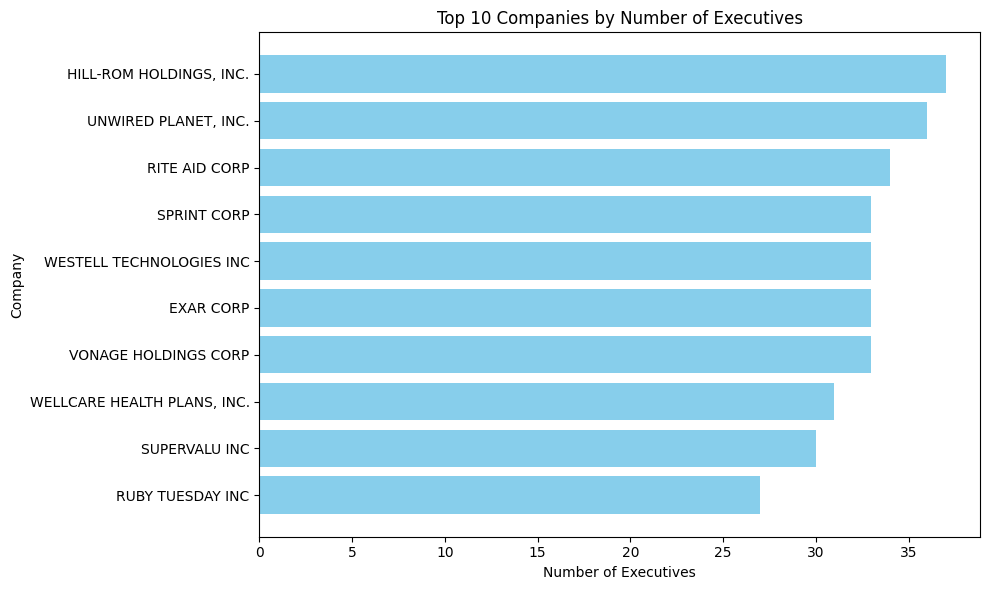

In [ ]:
def get_company_degree_centrality():
    companies = []
    executive_counts = []

    with driver.session() as session:
        query = """
        MATCH (c:Company)<-[:WORKS_FOR]-(e:Executive)
        RETURN c.name AS Company, COUNT(e) AS ExecutiveCount
        ORDER BY ExecutiveCount DESC
        LIMIT 10
        """
        result = session.run(query)
        for record in result:
            companies.append(record['Company'])
            executive_counts.append(record['ExecutiveCount'])

    return companies, executive_counts

companies, executive_counts = get_company_degree_centrality()


plt.figure(figsize=(10, 6))
plt.barh(companies, executive_counts, color='skyblue')
plt.xlabel('Number of Executives')
plt.ylabel('Company')
plt.title('Top 10 Companies by Number of Executives')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest at the top
plt.tight_layout()
plt.show()

Above bar chart illustrates the top 10 companies ranked by the number of executives they have. It visually represents the companies with the largest executive teams, indicating that "HILL-ROM HOLDINGS, INC." and "UNWIRED PLANET, INC." have the most executives among those listed, each having over 30 executives. The chart helps identify organizations with significant leadership, possibly implying greater management complexity or broader operations.

--------------------------------------------------------------------------------

**Analyzing Betweenness Centrality:**

In my analysis, I'm calculating betweenness centrality to understand which executives are connecting multiple companies. This helps identify executives who play significant roles across different organizations, indicating their influence or strategic importance in bridging multiple companies.

In [ ]:
def get_betweenness_centrality_results():
    executives = []
    num_companies = []

    with driver.session() as session:
        query = """
        MATCH (e:Executive)-[:WORKS_FOR]->(c:Company)
        WITH e, COUNT(c) AS NumCompanies
        WHERE NumCompanies > 1
        RETURN e.name AS Executive, NumCompanies
        ORDER BY NumCompanies DESC
        LIMIT 10
        """
        result = session.run(query)
        for record in result:
            executives.append(record['Executive'])
            num_companies.append(record['NumCompanies'])

    return executives, num_companies

executives, num_companies = get_betweenness_centrality_results()

fig = px.bar(
    x=num_companies,
    y=executives,
    orientation='h',
    labels={'x': 'Number of Companies', 'y': 'Executive'},
    title='Top Executives Connected to Multiple Companies'
)

fig.update_layout(
    xaxis_title="Number of Companies",
    yaxis_title="Executive",
    yaxis=dict(
        categoryorder='total ascending'
    )
)

fig.show()

<ipython-input-74-8d00ca9a068e>:7: DeprecationWarning: Using a driver after it has been closed is deprecated. Future versions of the driver will raise an error.
  with driver.session() as session:


Above graph displays the top executives who are associated with multiple companies, showing how many companies each executive is connected to. Executives like Mr. Andrew B. Nace and Ms. Renee L. Wilm J.D. are linked to the highest number of companies, indicating their broad influence and involvement in multiple organizations.

--------------------------------------------------------------------------------

In below code, I am focusing on analyzing betweenness centrality. It helps identify executives who serve as connectors or bridges between multiple companies, thereby it highlights top individuals with significant influence across different organizations. The graph illustrates the number of companies each executive is connected to, which indicates their central role in connecting different parts of the corporate network.

In [ ]:
executives = []
num_companies = []
company_list = []

for record in bridges_results:
    executives.append(record['Executive'])
    num_companies.append(len(record['Companies']))  # Number of companies the executive is connected to
    company_list.append(", ".join(record['Companies']))  # List of company names as a single string

data = {
    "Executive": executives,
    "Number of Companies": num_companies,
    "Companies": company_list
}

df = pd.DataFrame(data)

fig = px.bar(
    df,
    x="Number of Companies",
    y="Executive",
    text="Companies",
    orientation='h',
    labels={'Number of Companies': 'Number of Companies Connected', 'Executive': 'Executive'},
    title='Top Executives Bridging Multiple Companies'
)

fig.update_layout(
    xaxis_title="Number of Companies Connected",
    yaxis_title="Executive",
    yaxis=dict(
        categoryorder='total ascending'
    )
)

fig.show()


Above graph shows the top executives who are connected to multiple companies. It illustrates how some executives play a key role in linking different organizations. Each bar represents an executive and the number of companies they are involved with, giving insight into the influence and reach of these individuals across multiple corporate entities.

--------------------------------------------------------------------------------

The below analysis relates to bridging centrality or inter-organizational connectivity. Specifically, it helps in understanding how executives serve as bridges between different companies. This can be associated with betweenness centrality since it highlights individuals who hold important positions across multiple organizations, effectively connecting these companies through their shared executives.

In [ ]:
query = """
MATCH (e:Executive)-[:WORKS_FOR]->(c1:Company), (e)-[:WORKS_FOR]->(c2:Company)
WHERE c1 <> c2
RETURN c1.name AS Company1, c2.name AS Company2, COUNT(e) AS SharedExecutives
ORDER BY SharedExecutives DESC
LIMIT 10
"""
shared_executives_results = graph.run(query).data()

print("\nTop 10 Pairs of Companies Sharing the Most Executives:")
for record in shared_executives_results:
    print(f"Company 1: {record['Company1']}, Company 2: {record['Company2']}, Shared Executives: {record['SharedExecutives']}")



Top 10 Pairs of Companies Sharing the Most Executives:
Company 1: Empire State Realty Trust, Inc., Company 2: Empire State Realty OP, L.P., Shared Executives: 9
Company 1: Empire State Realty OP, L.P., Company 2: Empire State Realty Trust, Inc., Shared Executives: 9
Company 1: Ellington Financial Inc., Company 2: Ellington Credit Company, Shared Executives: 8
Company 1: Ellington Credit Company, Company 2: Ellington Financial Inc., Shared Executives: 8
Company 1: Restaurant Brands International Inc., Company 2: Restaurant Brands International Limited Partnership, Shared Executives: 7
Company 1: Wisconsin Electric Power Company, Company 2: WEC Energy Group, Inc., Shared Executives: 7
Company 1: Cheniere Energy, Inc., Company 2: Cheniere Energy Partners, L.P., Shared Executives: 7
Company 1: Cheniere Energy Partners, L.P., Company 2: Cheniere Energy, Inc., Shared Executives: 7
Company 1: WEC Energy Group, Inc., Company 2: Wisconsin Electric Power Company, Shared Executives: 7
Company 1:

In [ ]:
driver.close()


## **5. Financial Query and Report Generation via GraphRAG. The user should be able to query specific financial metrics, trends, or insights from the dataset using plain English.**

For this analysis, I am using two datasets named "sub" and "num". From the "sub" dataset, I have extracted columns like adsh, cik, name, and fy (fiscal year). From the "num" dataset, I have taken adsh, tag, and value. The tags focused on includes financial metrics such as assets, liabilities, revenues, and gross profit.

I am merging these two datasets on the basis of adsh and performed some data cleaning to refine the merged dataset. To simplify the data and prepare it for efficient processing, I have grouped it by adsh, name, tag, and fy, and then calculated the sum of value for each group.

The next step involves setting up the processed data in Neo4j to begin the GraphRAG (Graph Retrieval Augmented Generation) process.



In [ ]:
!pip install neo4j
!pip install py2neo
!pip install openai
!pip install fuzzywuzzy
!pip install nltk

In [ ]:
from fuzzywuzzy import fuzz, process
from nltk.corpus import wordnet
import nltk
import datetime
import spacy
import re
import pandas as pd
from neo4j import GraphDatabase
from py2neo import Graph, Node, Relationship

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

In [ ]:
sub_file_path = concatenated_path + '/combined_sub.csv'
num_file_path = concatenated_path + '/combined_num.csv'

In [ ]:
sub_df = pd.read_csv(sub_file_path, usecols=['adsh', 'cik', 'name','fy'])
num_df = pd.read_csv(num_file_path, usecols=['adsh', 'tag', 'value'])

In [ ]:
tags_to_include = [
    "Assets", "Liabilities",
    "Revenues", "GrossProfit"]

num_df = num_df[num_df['tag'].isin(tags_to_include)]

merged_df = pd.merge(num_df, sub_df, on='adsh')

merged_df['fy'] = merged_df['fy'].astype('Int64')

merged_df = merged_df.drop_duplicates(subset=['adsh', 'tag', 'value', 'cik','fy'])

merged_df

In [ ]:
grouped_df = merged_df.groupby(['adsh', 'name', 'tag','fy']).agg({'value': 'sum'}).reset_index()
grouped_df = grouped_df.drop_duplicates(subset=['name', 'tag','fy'])
grouped_df.head()

In [ ]:
grouped_df.dropna(subset=['name', 'tag', 'value','fy'], inplace=True)  # Drop rows with NaN in 'name', 'tag', or 'value'
grouped_df = grouped_df[['name', 'tag', 'value', 'fy']]

In [ ]:
grouped_df

In [ ]:
# If you have run this bit of a code for previous question no need to run again
uri = userdata.get('PROJECT2_URI')
username = userdata.get('PROJECT2_USER')
password = userdata.get('PROJECT2_PWD')

# Neo4j connection
uri = uri
username = username
password = password

driver = GraphDatabase.driver(uri, auth=(username, password))
graph = Graph(uri, auth=(username, password))



In [ ]:

def create_company_and_metric(tx, records):
    query = """
    UNWIND $records AS record
    MERGE (c:Company {name: record.name})
    MERGE (m:Metric {tag: record.tag, fy: record.fy})
    ON CREATE SET m.value = record.value
    ON MATCH SET m.value = record.value
    MERGE (c)-[:HAS_METRIC {fy: record.fy, value: record.value}]->(m)
    """
    tx.run(query, records=records)

def load_to_neo4j(df, batch_size=1000):
    records = df.to_dict('records')
    total_records = len(records)

    with driver.session() as session:
        for i in range(0, total_records, batch_size):
            batch = records[i:i + batch_size]
            session.execute_write(create_company_and_metric, batch)
            print(f"Loaded batch {i // batch_size + 1} of size {len(batch)}")

load_to_neo4j(grouped_df)
print("Data loaded into Neo4j.")


In this project, I’m using a GraphRAG approach to process natural language queries and retrieve financial data for metrics like **Assets, Liabilities, Revenues, and GrossProfit** from a Neo4j database. My code identifies the financial metric being requested, matches the company name, and extracts the fiscal year from the query. Once it has this information, it runs a Cypher query on the database, allowing users to ask questions in plain English and get the relevant financial data.

In [ ]:


nlp = spacy.load("en_core_web_sm")

tags_dict = {
    "Assets": ["assets", "total assets", "current assets", "net assets"],
    "Liabilities": ["liabilities", "total liabilities", "current liabilities", "net liabilities"],
    "Revenues": ["revenues", "revenue", "total revenue", "sales", "income"],
    "GrossProfit": ["gross profit", "gross margin", "profit"]
}

def get_tag_from_synonym(plain_text_query):
    for tag, synonyms in tags_dict.items():
        for synonym in synonyms:
            if synonym.lower() in plain_text_query.lower():
                return tag
    return None

def fuzzy_match_company(company_query, possible_names, threshold=85):
    best_match = None
    highest_score = 0
    company_query_clean = company_query.strip().upper()  # Clean company name
    for name in possible_names:
        name_clean = name.strip().upper()  # Clean the possible names
        score = fuzz.token_sort_ratio(company_query_clean, name_clean)
        if score > highest_score and score >= threshold:
            highest_score = score
            best_match = name
    return best_match

def extract_fiscal_year(query):
    current_year = datetime.datetime.now().year
    match = re.search(r'\b(20\d{2})\b', query)
    if match:
        return int(match.group(0))
    elif "last year" in query.lower():
        return current_year - 1
    elif "current year" in query.lower():
        return current_year
    return None

def process_query_neo4j(query):
    doc = nlp(query)

    tag = get_tag_from_synonym(query)
    if tag is None:
        return "Unable determine which financial metric you are asking about."

    fiscal_year = extract_fiscal_year(query)

    all_companies = graph.run("MATCH (c:Company) RETURN DISTINCT c.name AS name").data()
    all_company_names = [company['name'] for company in all_companies]

    company_name = None
    for ent in doc.ents:
        if ent.label_ == "ORG":
            company_name = fuzzy_match_company(ent.text.upper(), all_company_names)
            break

    if not company_name:
        return "Unable to find a company name in your query."

    if fiscal_year:
        cypher_query = """
        MATCH (c:Company {name: $company_name})-[:HAS_METRIC]->(m:Metric {tag: $tag, fy: $fiscal_year})
        RETURN c.name AS company, m.tag AS metric, SUM(m.value) AS value, m.fy AS fiscal_year
        ORDER BY fiscal_year DESC
        """
    else:
        cypher_query = """
        MATCH (c:Company {name: $company_name})-[:HAS_METRIC]->(m:Metric {tag: $tag})
        RETURN c.name AS company, m.tag AS metric, SUM(m.value) AS value, m.fy AS fiscal_year
        ORDER BY fiscal_year DESC
        """

    results = graph.run(cypher_query, company_name=company_name, tag=tag, fiscal_year=fiscal_year).data()

    if not results:
        return f"No data found for {tag} of company '{company_name}'."

    response = f"Data for {tag} of company '{company_name}':\n"
    for record in results:
        response += f"Fiscal Year: {record['fiscal_year']}, Value: {record['value']}\n"

    return response


In [ ]:
queries = [
    "Give me assets of ADAMS RESOURCES & ENERGY, INC. in 2015",
    "Show me liabilities of GRAND PERFECTA, INC. in 2017",
    "What were the revenues of ADAMS RESOURCES & ENERGY, INC. in 2015",
    "Get liabilities for ADAMS RESOURCES & ENERGY, INC. in 2016",
]

for user_query in queries:
    print(f"Processing query: {user_query}")
    response = process_query_neo4j(user_query)
    print(response)
    print('*' * 50)


This process is retrieving financial data based on a list of predefined queries about specific companies and their financial metrics for a given year. It processes each query, fetching the relevant financial data from a database or providing a message if no matching data is found. The output will either show the requested financial data or indicate if the company or information isn’t available.

In [ ]:
drive.close()